### A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. (source - Wikipedia)

## Mainly three types of recommendation systems in machine learning based on filtering are used to suggest product and services to the consumers.

1. Content Filtering

2. Collaborative Filtering

3. Hybrid Filtering

### 1. Content Filtering:

In this algorithm, we try finding items look alike. Once we have item look like matrix,we can easily recommend alike items to a customer, who has purchased any item from the store.

### 2. Collaborative Filtering:

Here, we try to search for look alike customers and offer products based on what his/her lookalike has chosen.This algorithm is very effective but takes a lot of time and resources.

### 3. Hybrid Filtering (Content Filtering + Collaborative Filtering):

Both Content Filtering & Collaborative Filtering is used for the purpose. you-tube uses this algorithm for their strong recommendation system.


  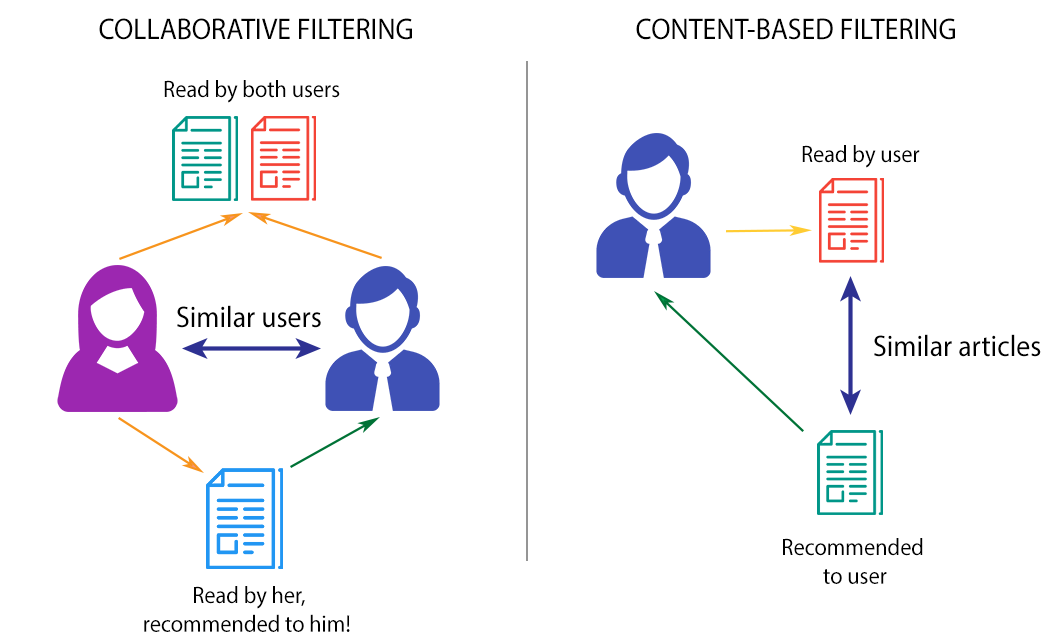

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
## importing datasets
users=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/BX-Users.csv',sep=";",error_bad_lines=False, encoding='latin-1')
books = pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/BX-Books.csv',sep=";",error_bad_lines=False, encoding='latin-1')
rating=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/BX-Book-Ratings.csv',sep=";",error_bad_lines=False, encoding='latin-1')

In [ ]:
books.head()

In [ ]:
books.columns

In [ ]:
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']] #feature engineering : selecting features

In [ ]:
books.head(2)

In [ ]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True) #feature engineering : changing the column names

In [ ]:
books.head(2)

In [ ]:
users.head(2)

In [ ]:
users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True) #feature engineering : changing the column names

In [ ]:
rating.head(2)

In [ ]:
rating.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True) #feature engineering : changing the column names

In [ ]:
rating.head(2)

In [ ]:
books.shape

In [ ]:
users.shape

In [ ]:
rating.shape

In [ ]:
## unique users
rating['user_id'].value_counts().shape

In [ ]:
## considering those users who have viewed more than 200 books
x=rating['user_id'].value_counts()>200


In [ ]:
x[x].shape

In [ ]:
y=x[x].index

In [ ]:
rating=rating[rating['user_id'].isin(y)]

In [ ]:
rating.shape

In [ ]:
rating_with_books=rating.merge(books,on='ISBN') ##those users who have viewed more than 200 books with there rating on books

In [ ]:
rating_with_books.shape

In [ ]:
number_rating=rating_with_books.groupby('title')['rating'].count().reset_index() ## total rating of a book 

In [ ]:
number_rating.rename(columns={'rating':'number of rating'},inplace=True) #feature engineering : changing the column names

In [ ]:
number_rating.head()

In [ ]:
final_ratings=rating_with_books.merge(number_rating,on='title') 

In [ ]:
final_ratings.head()

In [ ]:
final_ratings.shape

In [ ]:
final_ratings=final_ratings[final_ratings['number of rating']>=50] ## considering those books which has got more than 50 ratings 

In [ ]:
final_ratings.shape

In [ ]:
final_ratings.drop_duplicates(['user_id','title'],inplace=True) ## droping the same record 

In [ ]:
final_ratings.shape

In [ ]:
book_pivot=final_ratings.pivot_table(columns='user_id',index='title',values='rating') ## pivot table

In [ ]:
book_pivot.shape

In [ ]:
book_pivot.fillna(0,inplace=True)

In [ ]:
book_pivot

In [ ]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)

In [ ]:
type(book_sparse)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute') ## model

In [ ]:
model.fit(book_sparse)

In [ ]:
book_pivot.iloc[237,:].values.reshape(1,-1)

In [ ]:
distances,suggestions=model.kneighbors(book_pivot.iloc[54,:].values.reshape(1,-1))

In [ ]:
distances

In [ ]:
suggestions ## recommendation

In [ ]:
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

In [ ]:
def reco(book_name):
    book_id=np.where(book_pivot.index==book_name)[0][0]
    distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1))
    
    
    
    for i in range(len(suggestions)):
        if i==0:
            print("the suggestions are ",book_name,"are : ")
        if not i:
            print(book_pivot.index[suggestions[i]])

In [ ]:
reco('Animal Farm')